# BIVARIATE ANALYSIS
- 2 variable

* **Categorical vs. Categorical**

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# We load the pickle file so we have the correct data type

# df = pd.read_pickle('data_MPG_clean.pkl')

# or use csv file
df = pd.read_csv('data_MPG.csv')

In [4]:
# print 10 sample values

print(df.sample(10))

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
353  33.0          4         105.0        74.0    2190          14.2   
198  33.0          4          91.0        53.0    1795          17.4   
105  13.0          8         360.0       170.0    4654          13.0   
127  19.0          6         232.0       100.0    2901          16.0   
260  18.6          6         225.0       110.0    3620          18.7   
142  26.0          4          79.0        67.0    1963          15.5   
187  17.5          8         305.0       140.0    4215          13.0   
30   28.0          4         140.0        90.0    2264          15.5   
212  16.5          8         350.0       180.0    4380          12.1   
316  19.1          6         225.0        90.0    3381          18.7   

     model_year  origin                               name  
353          81  europe                   volkswagen jetta  
198          76   japan                        honda civic  
105          73     usa 

In [5]:
# Display the descriptive stats

print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


# Categorical columns

In [6]:
# Identify categorical columns
# step1: identify number of unique values in each column
print(df.nunique())

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64


In [7]:
# step2: Based on the count, it seems that [ "cylinders", "model_year", "origin" ] are categorical
# lets see their unique values

print(df['cylinders'].unique())
print(df['model_year'].unique())
print(df['origin'].unique())

[8 4 6 3 5]
[70 71 72 73 74 75 76 77 78 79 80 81 82]
['usa' 'japan' 'europe']


### Categorical columns
```
columns = ['origin', 'cylinders', 'model_year']
```

# Cross-tabulation (Counts)

In [8]:
# origin vs cylinders

ct = pd.crosstab(df['origin'], df['cylinders'])
print(ct)

# observ: What this shows
# How many cars of each cylinder count come from each origin

cylinders  3   4  5   6    8
origin                      
europe     0  63  3   4    0
japan      4  69  0   6    0
usa        0  72  0  74  103


In [9]:
# origin vs model_year

ct = pd.crosstab(df['origin'], df['model_year'])
print(ct)

model_year  70  71  72  73  74  75  76  77  78  79  80  81  82
origin                                                        
europe       5   4   5   7   6   6   8   4   6   4   9   4   2
japan        2   4   5   4   6   4   4   6   8   2  13  12   9
usa         22  20  18  29  15  20  22  18  22  23   7  13  20


In [10]:
# cylinders vs model_year

ct = pd.crosstab(df['cylinders'], df['model_year'])
print(ct)

model_year  70  71  72  73  74  75  76  77  78  79  80  81  82
cylinders                                                     
3            0   0   1   1   0   0   0   1   0   0   1   0   0
4            7  13  14  11  15  12  15  14  17  12  25  21  28
5            0   0   0   0   0   0   0   0   1   1   1   0   0
6            4   8   0   8   7  12  10   5  12   6   2   7   3
8           18   7  13  20   5   6   9   8   6  10   0   1   0


# Cross-tabulation (Proportions)

In [11]:
# origin vs cylinders

ct_prop = pd.crosstab(
    df['origin'],
    df['cylinders'],
    normalize='index'
)

print(ct_prop * 100) # convert to percentage

cylinders         3          4         5          6          8
origin                                                        
europe     0.000000  90.000000  4.285714   5.714286   0.000000
japan      5.063291  87.341772  0.000000   7.594937   0.000000
usa        0.000000  28.915663  0.000000  29.718876  41.365462


In [12]:
# origin vs model_year

ct_prop = pd.crosstab(
    df['origin'],
    df['model_year'],
    normalize='index'
)

print(ct_prop * 100) # convert to percentage

model_year        70        71        72         73        74        75  \
origin                                                                    
europe      7.142857  5.714286  7.142857  10.000000  8.571429  8.571429   
japan       2.531646  5.063291  6.329114   5.063291  7.594937  5.063291   
usa         8.835341  8.032129  7.228916  11.646586  6.024096  8.032129   

model_year         76        77         78        79         80         81  \
origin                                                                       
europe      11.428571  5.714286   8.571429  5.714286  12.857143   5.714286   
japan        5.063291  7.594937  10.126582  2.531646  16.455696  15.189873   
usa          8.835341  7.228916   8.835341  9.236948   2.811245   5.220884   

model_year         82  
origin                 
europe       2.857143  
japan       11.392405  
usa          8.032129  


In [13]:
# cylinders vs model_year

ct_prop = pd.crosstab(
    df['cylinders'],
    df['model_year'],
     normalize='index'
)

print(ct_prop * 100) # convert to percentage

model_year         70        71         72         73        74         75  \
cylinders                                                                    
3            0.000000  0.000000  25.000000  25.000000  0.000000   0.000000   
4            3.431373  6.372549   6.862745   5.392157  7.352941   5.882353   
5            0.000000  0.000000   0.000000   0.000000  0.000000   0.000000   
6            4.761905  9.523810   0.000000   9.523810  8.333333  14.285714   
8           17.475728  6.796117  12.621359  19.417476  4.854369   5.825243   

model_year         76         77         78         79         80         81  \
cylinders                                                                      
3            0.000000  25.000000   0.000000   0.000000  25.000000   0.000000   
4            7.352941   6.862745   8.333333   5.882353  12.254902  10.294118   
5            0.000000   0.000000  33.333333  33.333333  33.333333   0.000000   
6           11.904762   5.952381  14.285714   7.14285

# Stacked Bar Chart — Proportions

cylinders         3          4         5          6          8
origin                                                        
europe     0.000000  90.000000  4.285714   5.714286   0.000000
japan      5.063291  87.341772  0.000000   7.594937   0.000000
usa        0.000000  28.915663  0.000000  29.718876  41.365462
#################



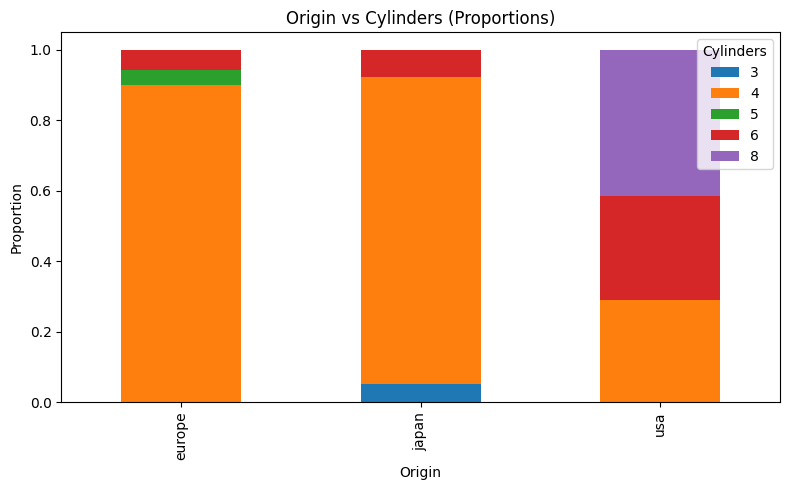

In [14]:
# origin vs cylinders

ct_prop = pd.crosstab(
    df['origin'],
    df['cylinders'],
    normalize='index'
)

print(ct_prop * 100) # convert to percentage
print("#################\n")

ct_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

plt.title("Origin vs Cylinders (Proportions)")
plt.ylabel("Proportion")
plt.xlabel("Origin")
plt.legend(title="Cylinders")
plt.tight_layout()
plt.show()


# Observation
- For Europe, major proportion of cars are 4 cylinders
- Europe has cars with 4, 5, 6 cylinders cars
- Only US has 8 cylinder cars
- and so on 

In [15]:
# TODO. Do the same for origin vs model_year, cylinders vs model_year

# Seaborn Count Plot (Grouped)

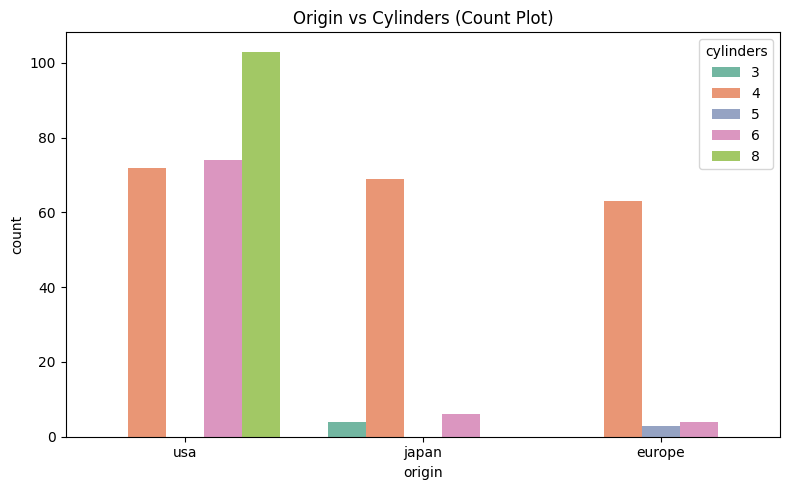

In [16]:
# origin vs cylinders

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='origin',
    hue='cylinders',
    palette='Set2'   # try: 'tab10', 'Set1', 'Paired'
)

plt.title("Origin vs Cylinders (Count Plot)")
plt.tight_layout()
plt.show()

# Observation:
- Only US has 8 cylinders.
- Only japan has 3 cylinders, etc